In [1]:
%cd /lustre/scratch126/cellgen/team205/aa34/Arian/Dis2P/dis2p_reproducibility/reproduce_benchmarks/eraslan/MIG/results

/lustre/scratch126/cellgen/team205/aa34/Arian/Dis2P/dis2p_reproducibility/reproduce_benchmarks/eraslan/MIG/results


In [2]:
import pickle
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [3]:
!ls

Biolord_split_1_MI_results.pkl	 dis2p_cE_split_4_MI_results.pkl
Biolord_split_2_MI_results.pkl	 scDisInfact_split_1_MI_results.pkl
Biolord_split_4_MI_results.pkl	 scDisInfact_split_2_MI_results.pkl
dis2p_cE_split_1_MI_results.pkl  scDisInfact_split_4_MI_results.pkl
dis2p_cE_split_2_MI_results.pkl


In [4]:
mig_max = {}
mig_cat = {}
for file in os.listdir():
    with open(file, 'rb') as fp:
        MI, MI_not_max, MI_not, MI_dif_max, MI_dif, maxMIG, concatMIG = pickle.load(fp)
        mig_max[file] = maxMIG
        mig_cat[file] = concatMIG

In [5]:
mig_max_df = pd.DataFrame(mig_max, index=['MaxMIG']).T
mig_max_df

,MaxMIG
Biolord_split_1_MI_results.pkl,0.368858
scDisInfact_split_4_MI_results.pkl,-0.136726
dis2p_cE_split_4_MI_results.pkl,0.083144
dis2p_cE_split_2_MI_results.pkl,0.114759
Biolord_split_2_MI_results.pkl,0.407500
Biolord_split_4_MI_results.pkl,0.183798
scDisInfact_split_1_MI_results.pkl,-0.161273
dis2p_cE_split_1_MI_results.pkl,0.110364
scDisInfact_split_2_MI_results.pkl,-0.163554


In [6]:
mig_cat_df = pd.DataFrame(mig_cat, index=['ConcatMIG']).T
mig_cat_df

,ConcatMIG
Biolord_split_1_MI_results.pkl,-0.040507
scDisInfact_split_4_MI_results.pkl,-0.181724
dis2p_cE_split_4_MI_results.pkl,0.052349
dis2p_cE_split_2_MI_results.pkl,0.097850
Biolord_split_2_MI_results.pkl,-0.054342
Biolord_split_4_MI_results.pkl,-0.090382
scDisInfact_split_1_MI_results.pkl,-0.218506
dis2p_cE_split_1_MI_results.pkl,0.124947
scDisInfact_split_2_MI_results.pkl,-0.218316


In [7]:
df1 = mig_max_df.copy()
df1['Split'] = df1.index.str.split('_').str[-3]
df1['Model'] = df1.index.str.split('_').str[0]
df1['Metric'] = 'maxMIG'
df1['Value'] = df1['MaxMIG']
df1 = df1.drop(columns=['MaxMIG'])

df2 = mig_cat_df.copy()
df2['Split'] = df2.index.str.split('_').str[-3]
df2['Model'] = df2.index.str.split('_').str[0]
df2['Metric'] = 'concatMIG'
df2['Value'] = df2['ConcatMIG']
df2 = df2.drop(columns=['ConcatMIG'])

df = pd.concat([df1, df2])
df

,Split,Model,Metric,Value
Biolord_split_1_MI_results.pkl,1,Biolord,maxMIG,0.368858
scDisInfact_split_4_MI_results.pkl,4,scDisInfact,maxMIG,-0.136726
dis2p_cE_split_4_MI_results.pkl,4,dis2p,maxMIG,0.083144
dis2p_cE_split_2_MI_results.pkl,2,dis2p,maxMIG,0.114759
Biolord_split_2_MI_results.pkl,2,Biolord,maxMIG,0.407500
Biolord_split_4_MI_results.pkl,4,Biolord,maxMIG,0.183798
scDisInfact_split_1_MI_results.pkl,1,scDisInfact,maxMIG,-0.161273
dis2p_cE_split_1_MI_results.pkl,1,dis2p,maxMIG,0.110364
scDisInfact_split_2_MI_results.pkl,2,scDisInfact,maxMIG,-0.163554
Biolord_split_1_MI_results.pkl,1,Biolord,concatMIG,-0.040507


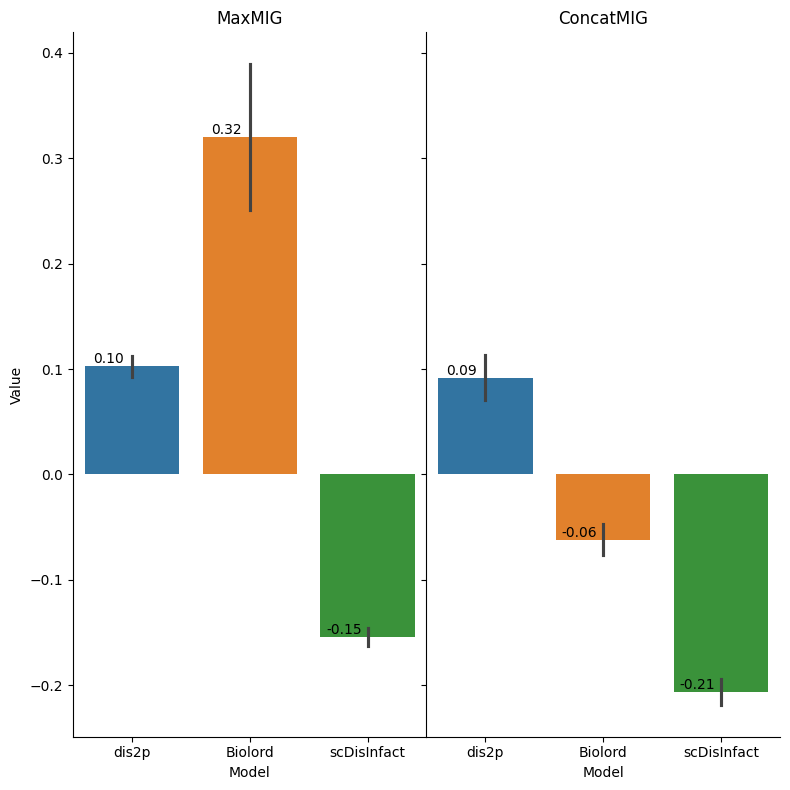

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the default colors from seaborn
default_palette = sns.color_palette()  # This gives you the default colors

# Create a custom palette with the desired order
custom_palette = {
    'dis2p': default_palette[0],     # Blue
    'Biolord': default_palette[1],   # Orange
    'scDisInfact': default_palette[2] # Green
}

fig, axes = plt.subplots(1, 2, figsize=(8, 8), sharey=True)

sns.barplot(df[df['Metric'] == 'maxMIG'],
            x='Model',
            y='Value',
            hue='Model', 
            errorbar='se',
            order=['dis2p', 'Biolord', 'scDisInfact'], 
            palette=custom_palette,
            ax=axes[0])

for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(
        p.get_x() + p.get_width() / 2 - 0.2,  # x coordinate of the text
        height,  # y coordinate of the text
        f'{height:.2f}',  # text to be displayed
        ha='center',  # horizontal alignment
        va='bottom'  # vertical alignment
    )
axes[0].set_title('MaxMIG')


sns.barplot(df[df['Metric'] == 'concatMIG'], 
            x='Model', 
            y='Value', 
            hue='Model', 
            errorbar='se', 
            order=['dis2p', 'Biolord', 'scDisInfact'],  
            palette=custom_palette,
            ax=axes[1])

for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(
        p.get_x() + p.get_width() / 2 - 0.2,  # x coordinate of the text
        height,  # y coordinate of the text
        f'{height:.2f}',  # text to be displayed
        ha='center',  # horizontal alignment
        va='bottom'  # vertical alignment
    )
axes[1].set_title('ConcatMIG')

axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['right', 'top']].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)

plt.show()
